<a href="https://colab.research.google.com/github/vagmin27/DeepLearning/blob/main/AutoEncoders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<center>

# **Autoencoders**
</center>


## **Building Blocks of Autoencoders**  


*   Encoder
*   Decoder
*   Latent Space


## **Significance of Autoencoders**


*   Feature Compression
*   Unsupervised Feature Learning


## **Types of Autoencoders**

* Shallow Autoencoders
* Deep Autoencoders
* Sparse Autoencoders
* Denoising Autoencoders

<center>

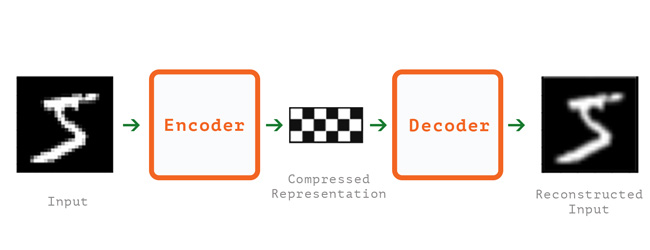

</center>

<h2>
<b>Identity Mapping:</b>
<h2>
<center>
$x = f(x)$
</center>
<h2>
But learning identity mapping. may not help to extract important features from the dataset.
Therefore, we introduce the approximated learning of the identity function.
The equation will be:
<h2>
<center>
$x ≈ f(x)$
</center>

In [ ]:
!pip uninstall -y torch torchvision torchaudio



Found existing installation: torch 2.9.0+cpu
Uninstalling torch-2.9.0+cpu:
  Successfully uninstalled torch-2.9.0+cpu
Found existing installation: torchvision 0.24.0+cpu
Uninstalling torchvision-0.24.0+cpu:
  Successfully uninstalled torchvision-0.24.0+cpu
Found existing installation: torchaudio 2.9.0+cpu
Uninstalling torchaudio-2.9.0+cpu:
  Successfully uninstalled torchaudio-2.9.0+cpu


In [ ]:
!pip install torch torchvision torchaudio


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 899.7/899.7 MB 785.3 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 594.3/594.3 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 106.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.0/88.0 MB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 954.8/954.8 kB 54.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 706.8/706.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.1/193.1 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 54.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.6/63.6 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 267.5/267.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.2/288.2 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 287.2/287.2 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
import os
import torch
import torchvision
import torch.nn as nn
import torchvision.transforms as transforms
import torch.optim as optim
import matplotlib.pyplot as plt
import torch.nn.functional as F
from torchvision import datasets
from torch.utils.data import DataLoader
import random
import numpy as np

# **MNIST**

In [ ]:
# Transforms images to a PyTorch Tensor
tensor_transform = transforms.Compose([
    transforms.ToTensor(),
    # transforms.Normalize((0.5,), (0.5,))
])
# Download the MNIST Dataset
train_set = datasets.MNIST(root = "./data",
                         train = True,
                         download = True,
                         transform = tensor_transform)

# DataLoader is used to load the dataset
# for training
train_loader = torch.utils.data.DataLoader(dataset = train_set,
                                     batch_size = 32,
                                     shuffle = True)

# for testing
test_set = datasets.MNIST(root = "./data",
                         train = False,
                         download = True,
                         transform = tensor_transform)

test_loader = torch.utils.data.DataLoader(dataset = test_set,
                                     batch_size = 32,
                                     shuffle = True)


100%|██████████| 9.91M/9.91M [00:01<00:00, 6.82MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 159kB/s]
100%|██████████| 1.65M/1.65M [00:01<00:00, 1.51MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 9.70MB/s]


# **Fashion-MNIST**


In [ ]:
# Transforms images to a PyTorch Tensor
tensor_transform = transforms.Compose([
    transforms.ToTensor(),
    # transforms.Normalize((0.5,), (0.5,))
])

# Download the MNIST Dataset
train_set = datasets.FashionMNIST(root = "./data",
                         train = True,
                         download = True,
                         transform = tensor_transform)

# DataLoader is used to load the dataset
# for training
train_loader = torch.utils.data.DataLoader(dataset = train_set,
                                     batch_size = 32,
                                     shuffle = True)

# for testing
test_set = datasets.FashionMNIST(root = "./data",
                         train = False,
                         download = True,
                         transform = tensor_transform)

test_loader = torch.utils.data.DataLoader(dataset = test_set,
                                     batch_size = 32,
                                     shuffle = True)


100%|██████████| 26.4M/26.4M [00:02<00:00, 9.03MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 142kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 2.69MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 10.4MB/s]


# **Data Visualization**

torch.Size([32, 1, 28, 28])
torch.Size([32])


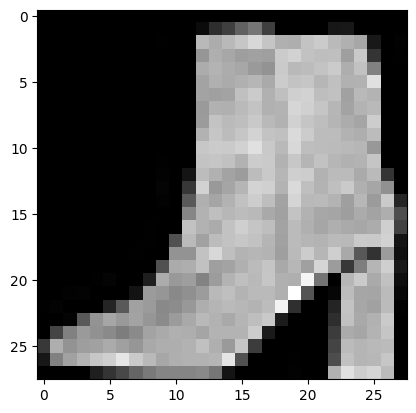

In [ ]:
for image, labels in train_loader:
  print(image.shape)
  print(labels.shape)

  # selecting a random image
  index = random.randint(0, 31)

  img = image[index]

  label = labels[index]

  img = img.reshape(28, 28)

  plt.imshow(img, cmap = 'gray')
  plt.grid(False)

  break

# **Math behind Autoencoders**

<h2>
<b>Input</b>: $X \in \mathbb{R}^{n \times d}$
<h2>
<b>Encoder</b>: $e: X → L \in \mathcal{R}^{n \times l} $ where $l$ is the dimension of the latent space
<h2>
<b>Decoder</b>: $d: L → \tilde{X} $
<h2>
Equation of the tranformation:

<center>
  $\tilde{x} = d(e(x))$
</center>
Equation with parameters:
<center>
$\tilde{x} = W_{d} W_{e} x$
</center>
where $W_{e}, W_{d}$ denotes the lernable weight matrices corresponds to Encoder and Decoder blocks respectively

</h2>


# **Encoder Model**



In [ ]:
class Encoder(nn.Module):
  def __init__(self, input_dim, hidden_dim):
    super(Encoder, self).__init__()

    self.enc1 = nn.Linear(input_dim, hidden_dim)
    self.act1 = nn.Tanh()

  def forward(self, x):
    x = self.enc1(x)
    x = self.act1(x)
    return x

# **Decoder Model**

In [ ]:
class Decoder(nn.Module):
  def __init__(self, output_dim, hidden_dim):
    super(Decoder, self).__init__()

    self.dec1 = nn.Linear(hidden_dim, output_dim)
    self.act1 = nn.Sigmoid()

  def forward(self, x):
    x = self.dec1(x)
    x = self.act1(x)
    return x

# **Autoencoder Model**

In [ ]:
class AutoEnc(nn.Module):
  def __init__(self, input_dim, output_dim, hidden_dim):
    super(AutoEnc, self).__init__()

    # encoder
    self.enc = Encoder(input_dim, hidden_dim)

    # decoder
    self.dec = Decoder(output_dim, hidden_dim)

  def forward(self, x):

    x = self.enc(x)

    # encoded part
    latent_x = x

    x = self.dec(x)

    return x, latent_x

# **Model, Optimizer and Loss function Definition**

# **Loss function:**

<h2>
<u>Mean Squared Loss (MSE)
<center>
$MSE(x, \tilde{x}) = ||x - \tilde{x}||^2$
</center>
</h2>

In [ ]:
# Model Initialization
model = AutoEnc(28*28, 28*28, 16)

# Validation using MSE Loss function
loss_function = torch.nn.MSELoss()

# Using an Adam OptimiMSE(x,x~)=||x−x~||2zer
optimizer = torch.optim.Adam(model.parameters(), lr = 1e-3)


# **Training Phaze**

In [ ]:
# num_epochs = 20
# losses = []

# # train mode
# model.train()

# # training of the model
# for epoch in range(num_epochs):

#   batch_loss = 0.0

#   for (image, _) in train_loader:

#     # input set
#     image = image.reshape(-1, 28*28)

#     # output after passing through the autoencoder
#     recon, latent_x = model(image)

#     loss = loss_function(recon, image)

#     # reset the previous gradients
#     optimizer.zero_grad()

#     # back-propagation alogirthm
#     loss.backward()

#     # updating the model paramterers
#     optimizer.step()

#     batch_loss += loss

#   # averaging losses of a single batch
#   avg_loss = batch_loss / 32

#   # accumulating avg loss per batch
#   losses.append(avg_loss)

#   print(f"Epoch: {epoch+1: 04d}, Loss: {loss: .4f}")

# # model saving
# torch.save(model.state_dict(), 'fashion-mnist_autoenc.pt')

# # Defining the Plot Style
# plt.style.use('seaborn')

# plt.xlabel('Iterations')
# plt.ylabel('Loss')

# # plottinh training loss
# plt.plot(losses)


In [ ]:
# loading the saved model from the directory
# model path for mnist dataset
model_path = os.getcwd() + '/saved_models/mnist_autoenc.pt'

# model path for fashion-mnist dataset
# model_path = os.getcwd() + '/saved_models/fashion-mnist_autoenc.pt'
model.load_state_dict(torch.load(model_path))

# evaluation mode
model.eval()

# **Testing Phase**

torch.Size([32, 1, 28, 28])
torch.Size([1, 28, 28])
torch.Size([1, 784])


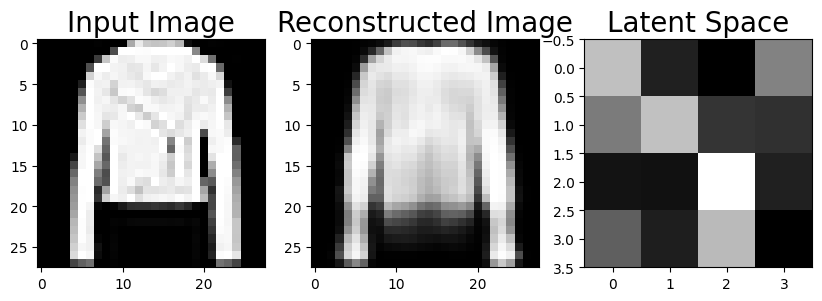

In [ ]:
for (image,_) in test_loader:

  print(image.shape)

  target_img = image[random.randint(0, 31)]
  print(target_img.shape)

  # input should be flattened
  recon, latent_x = model(target_img.reshape(-1, 28*28))
  print(recon.shape)


  # plotting reconstructred image with the original image
  fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (10, 10))

  target_img = target_img.reshape(28, 28)
  ax1.imshow(target_img, cmap = 'gray')
  ax1.set_title('Input Image', fontsize = 20)
  ax1.grid(False)

  recon = recon.detach().numpy().reshape(28, 28)
  ax2.imshow(recon, cmap = 'gray')
  ax2.set_title('Reconstructed Image', fontsize = 20)
  ax2.grid(False)

  latent_x = latent_x.detach().numpy().reshape(4, 4)
  ax3.imshow(latent_x, cmap = 'gray')
  ax3.set_title('Latent Space', fontsize = 20)
  ax3.grid(False)

  break

# **Output Visualization**

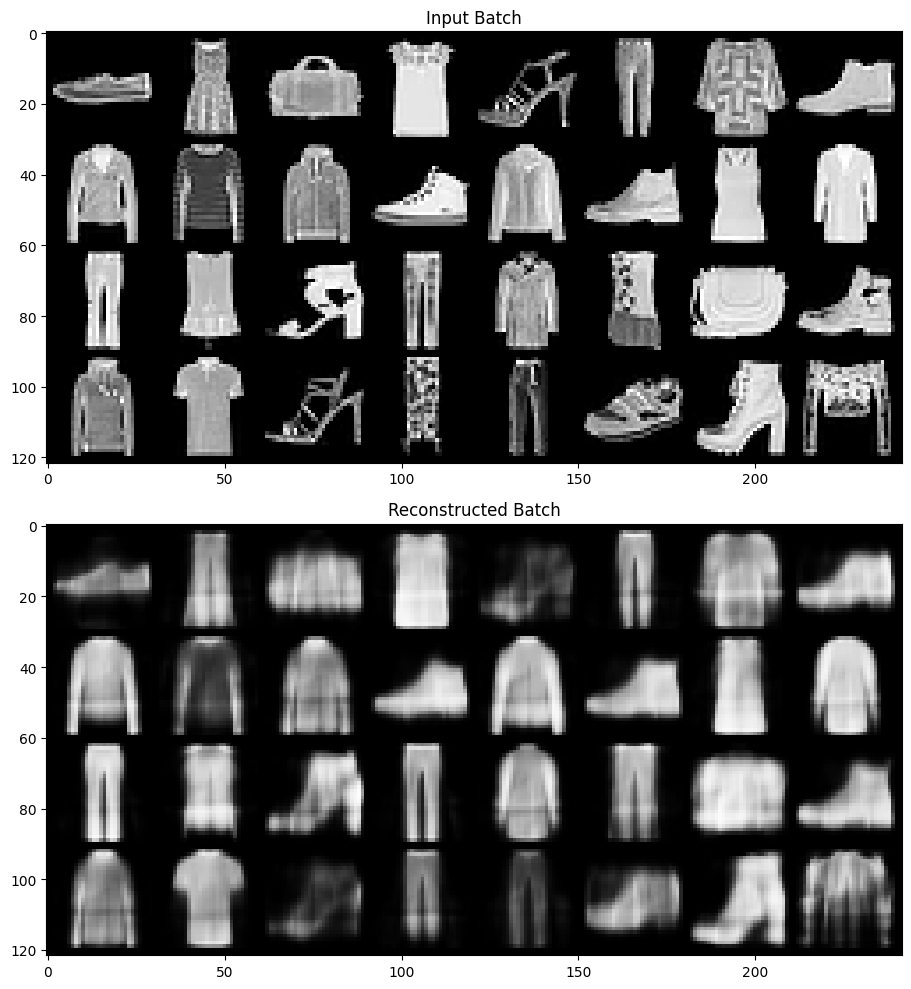

In [ ]:
for image, label in test_loader:

  image = image.reshape(-1, 28*28)
  recon, latent_x = model(image)
  # print(image.shape)
  # print(recon.shape)

  fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (10, 10))



  # takes input (B, C, H, W)
  # paddding = 2 (default)
  # images in a row  = 8
  input_set = torchvision.utils.make_grid(image.reshape(-1, 1, 28, 28)).detach().numpy()

  # print(input_set.shape)
  # (C, H, W)
  input_set = np.transpose(input_set, (1,2,0))
  # print("After transpose ", input_set.shape)

  # format is (H, W, C)
  ax1.imshow(input_set)
  ax1.title.set_text('Input Batch')
  ax1.grid(False)

  recon_set = torchvision.utils.make_grid(recon.reshape(-1, 1, 28, 28)).detach().numpy()
  # print(full_set.shape)
  ax2.imshow(np.transpose(recon_set, (1,2,0)))
  ax2.title.set_text('Reconstructed Batch')
  ax2.grid(False)

  # padding between subplots
  fig.tight_layout()

  break

  # 9 padding  = (9 * 2) + (28 * 8) = 242 (Row)
  # 5 paddings = (2 * 5) + (28 * 4) = 122 (Column)

In [ ]:
x = np.ones((1, 2, 3, 5))

# np.transpose(x).shape

np.transpose(x, (1, 3, 2, 0)).shape


(2, 5, 3, 1)


# **Deep Autoencoders**

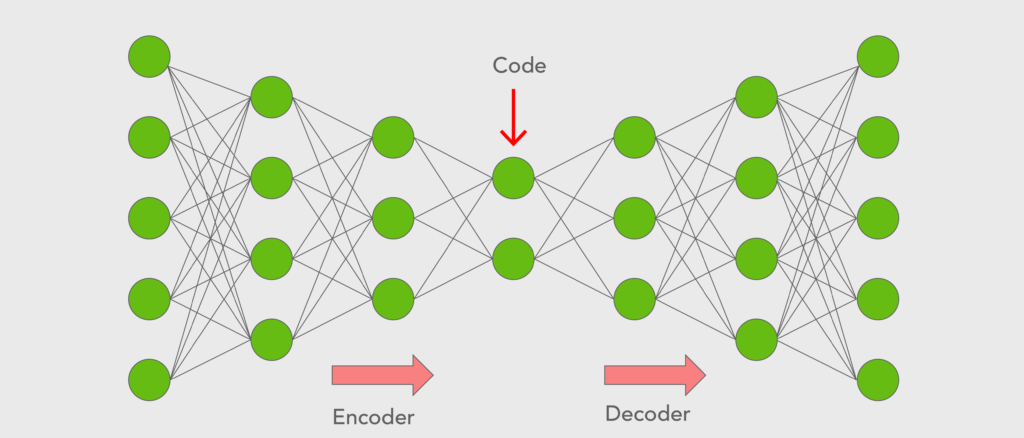



In [1]:
import torch
import torchvision
import torch.nn as nn
import torchvision.transforms as transforms
import torch.optim as optim
import matplotlib.pyplot as plt
import torch.nn.functional as F
from torchvision import datasets
from torch.utils.data import DataLoader
import random
import numpy as np
import os

In [2]:
# Transforms images to a PyTorch Tensor
tensor_transform = transforms.Compose([
    transforms.ToTensor(),
    # transforms.Normalize((0.5,), (0.5,))
])
# Download the MNIST Dataset
train_set = datasets.MNIST(root = "./data",
                         train = True,
                         download = True,
                         transform = tensor_transform)

# DataLoader is used to load the dataset
# for training
train_loader = torch.utils.data.DataLoader(dataset = train_set,
                                     batch_size = 32,
                                     shuffle = True)

# for testing
test_set = datasets.MNIST(root = "./data",
                         train = False,
                         download = True,
                         transform = tensor_transform)

test_loader = torch.utils.data.DataLoader(dataset = test_set,
                                     batch_size = 32,
                                     shuffle = True)


100%|██████████| 9.91M/9.91M [00:01<00:00, 6.13MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 161kB/s]
100%|██████████| 1.65M/1.65M [00:01<00:00, 1.52MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 6.52MB/s]


In [3]:
# Transforms images to a PyTorch Tensor
tensor_transform = transforms.Compose([
    transforms.ToTensor(),
    # transforms.Normalize((0.5,), (0.5,))
])
# Download the MNIST Dataset
train_set = datasets.FashionMNIST(root = "./data",
                         train = True,
                         download = True,
                         transform = tensor_transform)

# DataLoader is used to load the dataset
# for training
train_loader = torch.utils.data.DataLoader(dataset = train_set,
                                     batch_size = 32,
                                     shuffle = True)

# for testing
test_set = datasets.FashionMNIST(root = "./data",
                         train = False,
                         download = True,
                         transform = tensor_transform)

test_loader = torch.utils.data.DataLoader(dataset = test_set,
                                     batch_size = 32,
                                     shuffle = True)


100%|██████████| 26.4M/26.4M [00:03<00:00, 7.43MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 149kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 2.83MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 10.1MB/s]


torch.Size([32, 1, 28, 28])
torch.Size([32])


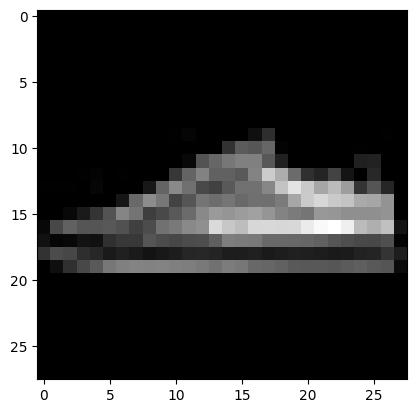

In [4]:
for image, labels in train_loader:

  print(image.shape)
  print(labels.shape)

  index = random.randint(0, 31)
  img = image[index]
  img = img.reshape(28, 28)
  plt.imshow(img, cmap = 'gray')
  plt.grid(False)
  break

In [5]:
#Encoder
class Encoder(nn.Module):
  def __init__(self):
    super().__init__()

    # five hidden layers
    self.enc_1 = torch.nn.Linear(28 * 28, 128)
    self.enc_2 = torch.nn.Linear(128, 64)
    self.enc_3 = torch.nn.Linear(64, 32)
    self.enc_4 = torch.nn.Linear(32, 16)
    self.enc_5 = torch.nn.Linear(16, 8)

  def forward(self, x):

    x = F.relu(self.enc_1(x))
    x = F.relu(self.enc_2(x))
    x = F.relu(self.enc_3(x))
    x = F.relu(self.enc_4(x))
    x = torch.tanh(self.enc_5(x))
    return x


In [6]:
#Decoder
class Decoder(nn.Module):
  def __init__(self):
    super().__init__()

    self.dec_1 = torch.nn.Linear(8, 16)
    self.dec_2 = torch.nn.Linear(16, 32)
    self.dec_3 = torch.nn.Linear(32, 64)
    self.dec_4 = torch.nn.Linear(64, 128)
    self.dec_5 = torch.nn.Linear(128, 28 * 28)

  def forward(self, x):

    x = F.relu(self.dec_1(x))
    x = F.relu(self.dec_2(x))
    x = F.relu(self.dec_3(x))
    x = F.relu(self.dec_4(x))
    x = self.dec_5(x)
    x = torch.sigmoid(x)
    return x


In [7]:
#Deep AutoEncoder Logic
class Deep_AE(torch.nn.Module):
	def __init__(self):
		super().__init__()

		self.enc = Encoder()
		self.dec = Decoder()

	def forward(self, input):

		latent_x = self.enc(input)
		recon = self.dec(latent_x)
		return recon


In [8]:
# Model Initialization
model = Deep_AE()

# Validation using MSE Loss function
loss_function = torch.nn.MSELoss()

# Using an Adam Optimizer with lr = 0.1
optimizer = torch.optim.Adam(model.parameters(), lr = 1e-3)


In [9]:
num_epochs = 20
losses = []

model.train()

for epoch in range(num_epochs):
	batch_loss = 0.0
	for (image, _) in train_loader:

		# Reshaping the image to (-1, 784)
		image = image.reshape(-1, 28*28)

		# Output of Autoencoder
		reconstructed = model(image)

		# Calculating the loss function
		loss = loss_function(reconstructed, image)

		# The gradients are set to zero,
		# the the gradient is computed and stored.
		# .step() performs parameter update
		optimizer.zero_grad()
		loss.backward()
		optimizer.step()

		# Storing the losses in a list for plotting
		batch_loss += loss

	avg_loss = batch_loss / 32
	losses.append(avg_loss)

	print(f"Epoch: {epoch+1: 04d}, Loss: {loss: .4f}")

torch.save(model.state_dict(), 'deep_ae_fashion-mnist.pt')

# Defining the Plot Style
plt.style.use('seaborn')
plt.xlabel('Iterations')
plt.ylabel('Loss')

plt.plot(losses)


Epoch:  001, Loss:  0.0333
Epoch:  002, Loss:  0.0246
Epoch:  003, Loss:  0.0271
Epoch:  004, Loss:  0.0288
Epoch:  005, Loss:  0.0241
Epoch:  006, Loss:  0.0260
Epoch:  007, Loss:  0.0197
Epoch:  008, Loss:  0.0197
Epoch:  009, Loss:  0.0178
Epoch:  010, Loss:  0.0224
Epoch:  011, Loss:  0.0236
Epoch:  012, Loss:  0.0186
Epoch:  013, Loss:  0.0208
Epoch:  014, Loss:  0.0234
Epoch:  015, Loss:  0.0227
Epoch:  016, Loss:  0.0157
Epoch:  017, Loss:  0.0199
Epoch:  018, Loss:  0.0195
Epoch:  019, Loss:  0.0165
Epoch:  020, Loss:  0.0206


OSError: 'seaborn' is not a valid package style, path of style file, URL of style file, or library style name (library styles are listed in `style.available`)

In [ ]:
# model_path = os.getcwd() + '/saved_models/deep_ae_fashion-mnist.pt'
# # model_path = os.getcwd() + '/saved_models/deep_ae_mnist.pt'

# model.load_state_dict(torch.load(model_path))
# model.eval()

In [ ]:
for (image,_) in test_loader:

  # print(image.shape)

  target_img = image[random.randint(0, 31)]
  # target_img = 1 - target_img

  # print(target_img.shape)

  recon = model(target_img.reshape(-1, 28*28))

  # print(recon.shape)

  # plotting reconstructred image with the original image
  fig, (ax1, ax2) = plt.subplots(1, 2)

  target_img = target_img.reshape(28, 28)
  ax1.imshow(target_img, cmap = 'gray')
  ax1.grid(False)

  recon = recon.detach().numpy().reshape(28, 28)
  ax2.imshow(recon, cmap = 'gray')
  ax2.grid(False)

  break

<center>
<h1> <b> Sparse Autoencoders </b> <h1>
</center>


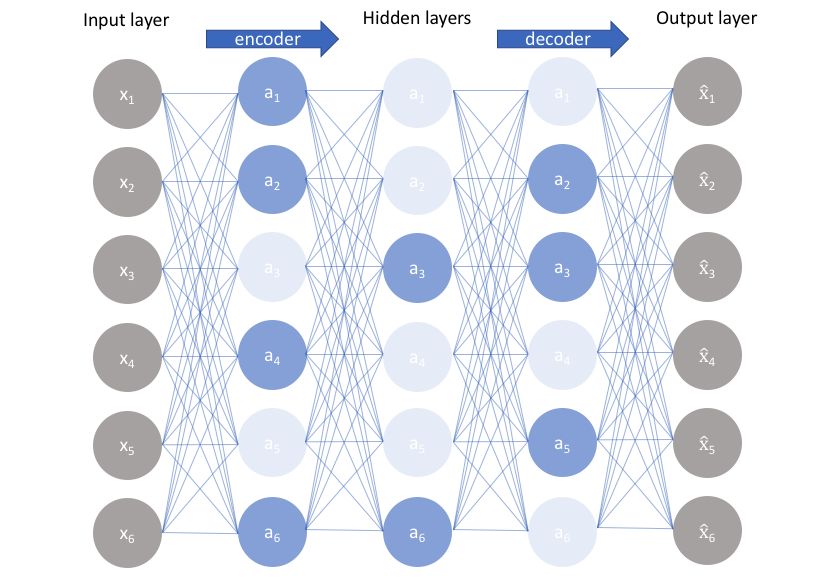







# **Utility**



*   <h2>Sparsity learns better representation
*   <h2>Sensitive to the inputs


<h2> <u><b>Loss Function:</b></u>
<center>
  $Loss(x, \tilde{x}) = MSE(x, \tilde{x}) + Regularizer$
</center>

<h2>
<b> $L_1$ vs $L_2$ Penalty </b>

* <h2>We know, $L_1 = ||W||$.

* <h2>The gradient of $L_1$ is either $+1$ or $-1$. Then $W$ will move towards zero by the step size $\pm 1$.

* <h2>The gradient will be zero when $w = 0$

* <h2>Again $L_2 = ||W||^2$.

* <h2>The gradient of $L_2 = 2W$. Then $W$ will move towards zero slowly but never becomes zero.
</h2>

In [10]:
import os
import torch
import torchvision
import torch.nn as nn
import torchvision.transforms as transforms
import torch.optim as optim
import matplotlib.pyplot as plt
import torch.nn.functional as F
from torchvision import datasets
from torch.utils.data import DataLoader
from torchvision.utils import save_image
import random
from PIL import Image
import numpy as np

In [11]:
class Encoder(nn.Module):
  def __init__(self):
    super().__init__()

    self.enc_1 = torch.nn.Linear(28 * 28, 128)
    self.enc_2 = torch.nn.Linear(128, 64)
    self.enc_3 = torch.nn.Linear(64, 32)
    self.enc_4 = torch.nn.Linear(32, 16)
    self.enc_5 = torch.nn.Linear(16, 8)

  def forward(self, x):

    x = F.relu(self.enc_1(x))
    x = F.relu(self.enc_2(x))
    x = F.relu(self.enc_3(x))
    x = F.relu(self.enc_4(x))
    x = F.relu(self.enc_5(x))
    return x


In [12]:
class Decoder(nn.Module):
  def __init__(self):
    super().__init__()

    self.dec_1 = torch.nn.Linear(8, 16)
    self.dec_2 = torch.nn.Linear(16, 32)
    self.dec_3 = torch.nn.Linear(32, 64)
    self.dec_4 = torch.nn.Linear(64, 128)
    self.dec_5 = torch.nn.Linear(128, 28 * 28)

  def forward(self, x):

    x = F.relu(self.dec_1(x))
    x = F.relu(self.dec_2(x))
    x = F.relu(self.dec_3(x))
    x = F.relu(self.dec_4(x))
    x = torch.sigmoid(self.dec_5(x))
    return x


In [13]:
class Sparse_AutoEnc(nn.Module):
  def __init__(self):
    super(Sparse_AutoEnc, self).__init__()

    self.enc = Encoder()
    self.dec = Decoder()

  def forward(self, x):
    x = self.enc(x)
    latent_x = x
    x = self.dec(x)
    return x, latent_x

In [14]:
# Model Initialization
model = Sparse_AutoEnc()

# Validation using MSE Loss function
loss_function = torch.nn.MSELoss()

# Using an Adam Optimizer
optimizer = torch.optim.Adam(model.parameters(), lr = 1e-3)


In [15]:
model_children = list(model.children())
print(model_children)

[Encoder(
  (enc_1): Linear(in_features=784, out_features=128, bias=True)
  (enc_2): Linear(in_features=128, out_features=64, bias=True)
  (enc_3): Linear(in_features=64, out_features=32, bias=True)
  (enc_4): Linear(in_features=32, out_features=16, bias=True)
  (enc_5): Linear(in_features=16, out_features=8, bias=True)
), Decoder(
  (dec_1): Linear(in_features=8, out_features=16, bias=True)
  (dec_2): Linear(in_features=16, out_features=32, bias=True)
  (dec_3): Linear(in_features=32, out_features=64, bias=True)
  (dec_4): Linear(in_features=64, out_features=128, bias=True)
  (dec_5): Linear(in_features=128, out_features=784, bias=True)
)]


# **L1 Penalty**

<h2>
$L_1 = \sum_{i} ||W||$ where $W_i$ is the activations of $i^{th}$ hidden layer.
</h2>

<h2>
$L_1$ penalty ensures sparsity by activating specific neurons of the autoencoder.

In [16]:
# estimating L1 penalty
def sparse_loss(model_children, images):

    loss = 0.0
    inputs = images

    for i in range(len(model_children)):

      # print(i+1, " ", model_children[i])
      # activation of the hidden layers
      inputs = F.relu((model_children[i](inputs)))

      loss += torch.mean(torch.abs(inputs))

    return loss

In [18]:
# num_epochs = 20
# losses = []
# lambda_val = 0.001

# # train mode
# model.train()

# # training of the model
# for epoch in range(num_epochs):
#   batch_loss = 0.0
#   for (image, _) in train_loader:

#     image = image.reshape(-1, 28*28)

#     recon, latent_x = model(image)

#     loss = loss_function(recon, image)

#     # adding sparsity loss
#     l1_penalty = sparse_loss(model_children, image) * lambda_val
#     loss += l1_penalty

#     optimizer.zero_grad()
#     loss.backward()
#     optimizer.step()

#     batch_loss += loss

#   # averaging losses of a single batch
#   avg_loss = batch_loss / 32

#   # accumulating avg loss per batch
#   losses.append(avg_loss)

#   print(f"Epoch: {epoch+1: 04d}, Loss: {avg_loss: .4f}")

# # model saving
# torch.save(model.state_dict(), 'model.pt')

# # Defining the Plot Style
# plt.style.use('seaborn')

# plt.xlabel('Iterations')
# plt.ylabel('Loss')

# # plotting training loss
# plt.plot(losses)


# **Denoising Autoencoders**

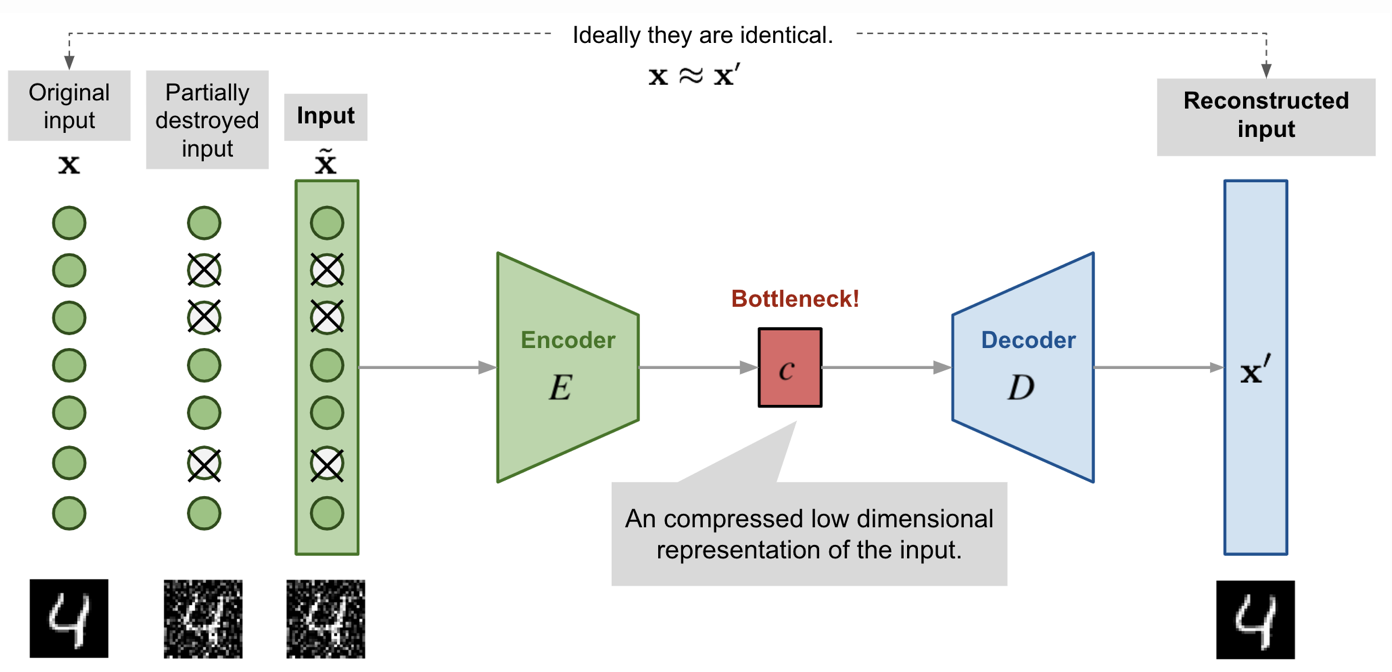


# **Utility**


*   <h2>Learns compressed features from the noisy data
*   <h2>Reconstruction of data from the noisy input
*   <h2>More robust compared to other autoencoders
*   <h2>Prevents learning the identity map



# **Noise Generation**

<h2>Standard Gaussian Noise $N(0, 1)$ is used to corrupt the input imgaes

In [19]:
def add_noise(inputs, noise_factor):

     noisy = inputs + torch.randn_like(inputs) * noise_factor

     noisy = torch.clamp(noisy, 0., 1.)

     return noisy

torch.Size([32, 1, 28, 28])
torch.Size([32])


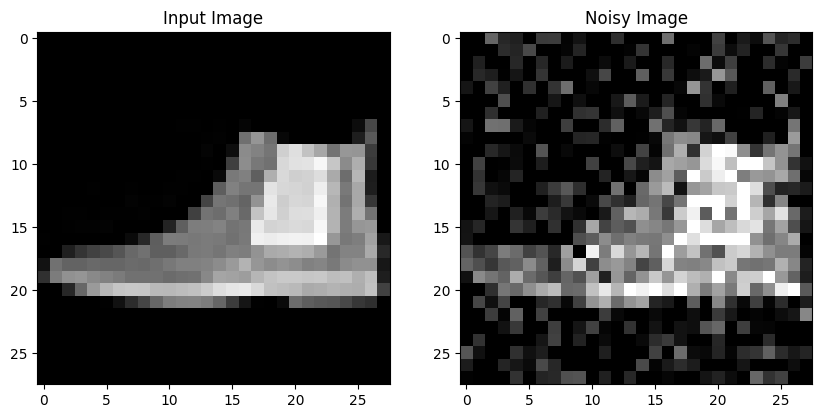

In [20]:
for image, labels in train_loader:
  print(image.shape)
  print(labels.shape)

  # selecting a random image
  index = random.randint(0, 31)
  img = image[index]
  label = labels[index]
  img = img.reshape(28, 28)

  # adding noise to the image
  noisy_img = add_noise(img, 0.2)

  figure, ax = plt.subplots(1, 2, figsize=(10, 10))

  ax[0].imshow(img, cmap = 'gray')
  ax[0].grid(False)
  ax[0].title.set_text('Input Image')

  ax[1].imshow(noisy_img, cmap = 'gray')
  ax[1].grid(False)
  ax[1].title.set_text('Noisy Image')

  break

In [21]:
class Encoder(nn.Module):
  def __init__(self):
    super().__init__()

    self.enc_1 = torch.nn.Linear(28 * 28, 128)
    self.enc_2 = torch.nn.Linear(128, 64)
    self.enc_3 = torch.nn.Linear(64, 32)
    self.enc_4 = torch.nn.Linear(32, 16)
    self.enc_5 = torch.nn.Linear(16, 8)

  def forward(self, x):

    x = F.relu(self.enc_1(x))
    x = F.relu(self.enc_2(x))
    x = F.relu(self.enc_3(x))
    x = F.relu(self.enc_4(x))
    x = F.relu(self.enc_5(x))
    return x


In [22]:
class Decoder(nn.Module):
  def __init__(self):
    super().__init__()

    self.dec_1 = torch.nn.Linear(8, 16)
    self.dec_2 = torch.nn.Linear(16, 32)
    self.dec_3 = torch.nn.Linear(32, 64)
    self.dec_4 = torch.nn.Linear(64, 128)
    self.dec_5 = torch.nn.Linear(128, 28 * 28)

  def forward(self, x):

    x = F.relu(self.dec_1(x))
    x = F.relu(self.dec_2(x))
    x = F.relu(self.dec_3(x))
    x = F.relu(self.dec_4(x))
    x = torch.sigmoid(self.dec_5(x))
    return x


In [23]:
class Denoising_AutoEnc(nn.Module):
  def __init__(self):
    super(Denoising_AutoEnc, self).__init__()

    self.enc = Encoder()
    self.dec = Decoder()

  def forward(self, x):
    x = self.enc(x)
    latent_x = x
    x = self.dec(x)
    return x, latent_x

In [24]:
# Model Initialization
model = Denoising_AutoEnc()

# Validation using MSE Loss function
loss_function = torch.nn.MSELoss()

# Using an Adam Optimizer
optimizer = torch.optim.Adam(model.parameters(), lr = 1e-3)


In [26]:
# num_epochs = 20
# losses = []
# lambda_val = 0.001

# # train mode
# model.train()

# # training of the model
# for epoch in range(num_epochs):
#   batch_loss = 0.0
#   for (image, _) in train_loader:

#     image = image.reshape(-1, 28*28)

#     # make it noisy
#     noisy_image = add_noise(image, 0.3)

#     # model output will be evaluated on noisy images
#     recon, latent_x = model(noisy_image)

#     # training will br done on original images only
#     loss = loss_function(recon, image)

#     optimizer.zero_grad()
#     loss.backward()
#     optimizer.step()

#     batch_loss += loss

#   # averaging losses of a single batch
#   avg_loss = batch_loss / 32

#   # accumulating avg loss per batch
#   losses.append(avg_loss)

#   print(f"Epoch: {epoch+1: 04d}, Loss: {avg_loss: .4f}")

# # model saving
# torch.save(model.state_dict(), 'denoise_fashion-mnist.pt')

# # Defining the Plot Style
# plt.style.use('seaborn')

# plt.xlabel('Iterations')
# plt.ylabel('Loss')

# # plotting training loss
# plt.plot(losses)


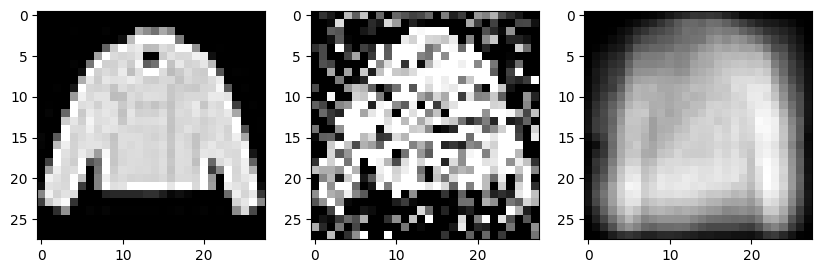

In [27]:
for (image,_) in test_loader:

  # print(image.shape)

  input_image = image[random.randint(0, 31)]

  # print(target_img.shape)
  input_image = input_image.reshape(-1, 28*28)
  noisy_image = add_noise(input_image, 0.5)

  recon, latent_x = model(noisy_image)

  # print(recon.shape)

  # plotting reconstructred image with the original image
  fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 10))

  input_image = input_image.reshape(28, 28)
  ax1.imshow(input_image, cmap = 'gray')
  # ax1.grid(None)

  noisy_image = noisy_image.reshape(28, 28)
  ax2.imshow(noisy_image, cmap = 'gray')
  # ax2.grid(None)

  recon = recon.detach().numpy().reshape(28, 28)
  ax3.imshow(recon, cmap = 'gray')
  # ax3.grid(None)

  break